In [1]:
import os
import numpy as np 
import pandas as pd 
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupShuffleSplit, GroupKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from typing import Any, Dict, Union

from yellowbrick import model_selection as ms
from yellowbrick.model_selection import validation_curve

from sklearn import metrics

from xgboost import XGBClassifier
from boruta import BorutaPy
from BorutaShap import BorutaShap, load_data
from sklearn.model_selection import train_test_split

In [2]:
patient_list  =  ['P1 N1', 'P2 N1', 'P3 N1', 'P3 N2','P4 N2', 'P5 N1',
                   'P6 N2', 'P7 N1','P8 N1','P10 N1', 'P11 N1', 'P15 N1',
                  'P16 N1', 'P17 N1', 'P18 N1','P20 N1', 'P21 N1', 'P21 N2', 'P21 N3',
                  'P22 N1','P23 N1', 'P23 N3', 'P24 N1','P27 N1','P28 N1',
                  'P28 N2', 'P29 N2', 'P30 N1']  #'P6 N1','P23 N2',

human_wt = ['P1', 'P11', 'P17', 'P18', 'P21', 'P24', 'P27','P28', 'P29', 'P4']

human_gap = ['P3','P10', 'P15', 'P16', 'P2', 'P5', 'P6', 'P7','P8', 'P20',  'P22',
            'P23', 'P30'] 

het_train = []
wt_train = []
het_test = []
wt_test = []
for tr_id in all_train_ids:
    if tr_id in SYNGAP_het:
        het_train.append(tr_id)
    if tr_id in SYNGAP_wt:
        wt_train.append(tr_id)

for tr_id in all_test_ids:
    if tr_id in SYNGAP_het:
        het_test.append(tr_id)
    if tr_id in SYNGAP_wt:
        wt_test.append(tr_id)

NameError: name 'all_train_ids' is not defined

In [3]:
for file in os.listdir('/home/melissa/RESULTS/XGBoost/Human_SYNGAP1/Cross_Corr_Channels/'):
    if file.startswith('P1 N1'):
        print(file)

P1 N1_E1_O1.npy
P1 N1_E2_M2.npy
P1 N1_C3_O1.npy
P1 N1_E1_F3.npy
P1 N1_F3_C3.npy
P1 N1_E2_O1.npy
P1 N1.csv
P1 N1_E1_M2.npy
P1 N1_C3_M2.npy
P1 N1_F3_M2.npy
P1 N1_E1_C3.npy
P1 N1_E1_E2.npy
P1 N1_E2_F3.npy
P1 N1_F3_O1.npy
P1 N1_O1_M2.npy
P1 N1_E2_C3.npy


In [6]:
#test_hfd = np.load(hfd_dir + 'P23 N3_01_hfd.npy')
#test_hfd.shape

In [7]:
#patient = 'P23 N3'
#hurst_E1 = np.load(hurst_dir + patient + '_E1_hurst.npy')
#hurst_E2 =  np.load(hurst_dir + patient + '_E2_hurst.npy')
#hurst_F3 =  np.load(hurst_dir + patient + '_F3_hurst.npy')
#hurst_C3 =  np.load(hurst_dir + patient + '_C3_hurst.npy')
#hurst_O1 = np.load(hurst_dir + patient + '_01_hurst.npy')
#hurst_M2 =  np.load(hurst_dir + patient + '_M2_hurst.npy')

In [88]:
#hurst_E1 = [hurst[0] for hurst in hurst_E1]
#hurst_E2 = [hurst[0] for hurst in hurst_E2]
#hurst_F3 = [hurst[0] for hurst in hurst_F3]
#hurst_C3 = [hurst[0] for hurst in hurst_C3]
#hurst_O1 = [hurst[0] for hurst in hurst_O1]
#hurst_M2 = [hurst[0] for hurst in hurst_M2]

In [8]:
#np.save(hurst_dir + patient + '_E1_hurst.npy', hurst_E1)
#np.save(hurst_dir + patient + '_E2_hurst.npy', hurst_E2)
#np.save(hurst_dir + patient + '_F3_hurst.npy', hurst_F3)
#np.save(hurst_dir + patient + '_C3_hurst.npy', hurst_C3)
#np.save(hurst_dir + patient + '_01_hurst.npy', hurst_O1)
#np.save(hurst_dir + patient + '_M2_hurst.npy', hurst_M2)

In [9]:
hfd_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/HFD_All_Epochs/'
hurst_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/Hurst/'
entropy_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/DispEn/'

delta_dir = '/home/melissa/RESULTS/XGBoost/Human_SYNGAP1/Delta_Power/'
theta_dir = '/home/melissa/RESULTS/XGBoost/Human_SYNGAP1/Theta_Power/'
alpha_dir = '/home/melissa/RESULTS/XGBoost/Human_SYNGAP1/Alpha_Power/'
beta_dir = '/home/melissa/RESULTS/XGBoost/Human_SYNGAP1/Beta_Power/'

cc_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Cross_Corr_Channels/'
plv_dir = '/home/melissa/RESULTS/XGBoost/Human_SYNGAP1/Phase_Lock_Channels/'

all_patients = []

for patient in patient_list:
        print(patient)
        len_data = len(np.load(hfd_dir + patient + '_E1_hfd.npy'))
        data_dict = {
            'Patient_ID': [patient]*len_data,
            'hfd_E1': np.load(hfd_dir + patient + '_E1_hfd.npy'),
            'hfd_E2': np.load(hfd_dir + patient + '_E2_hfd.npy'),
            'hfd_F3': np.load(hfd_dir + patient + '_F3_hfd.npy'),
            'hfd_C3': np.load(hfd_dir + patient + '_C3_hfd.npy'),
            'hfd_O1': np.load(hfd_dir + patient + '_01_hfd.npy'),
            'hfd_M2': np.load(hfd_dir + patient + '_M2_hfd.npy'),
                
            'hurst_E1': np.load(hurst_dir + patient + '_E1_hurst.npy'),
            'hurst_E2': np.load(hurst_dir + patient + '_E2_hurst.npy'),
            'hurst_F3': np.load(hurst_dir + patient + '_F3_hurst.npy'),
            'hurst_C3': np.load(hurst_dir + patient + '_C3_hurst.npy'),
            'hurst_O1': np.load(hurst_dir + patient + '_01_hurst.npy'),
            'hurst_M2': np.load(hurst_dir + patient + '_M2_hurst.npy'),
                
            'entr_E1': np.load(entropy_dir + patient + '_E1_dispen.npy'),
            'entr_E2': np.load(entropy_dir + patient + '_E2_dispen.npy'),
            'entr_F3': np.load(entropy_dir + patient + '_F3_dispen.npy'),
            'entr_C3': np.load(entropy_dir + patient + '_C3_dispen.npy'),
            'entr_O1': np.load(entropy_dir + patient + '_01_dispen.npy'),
            'entr_M2': np.load(entropy_dir + patient + '_M2_dispen.npy'),
                
            'delta_E1': np.load(delta_dir + patient + '_chan_0.npy'),
            'delta_E2': np.load(delta_dir + patient + '_chan_1.npy'), 
            'delta_F3': np.load(delta_dir + patient + '_chan_2.npy'),
            'delta_C3': np.load(delta_dir + patient + '_chan_3.npy'),
            'delta_O1': np.load(delta_dir + patient + '_chan_4.npy'),
            'delta_M2': np.load(delta_dir + patient + '_chan_5.npy'),
            
            'theta_E1': np.load(theta_dir + patient + '_chan_0.npy'),
            'theta_E2': np.load(theta_dir + patient + '_chan_1.npy'), 
            'theta_F3': np.load(theta_dir + patient + '_chan_2.npy'),
            'theta_C3': np.load(theta_dir + patient + '_chan_3.npy'),
            'theta_O1': np.load(theta_dir + patient + '_chan_4.npy'),
            'theta_M2': np.load(theta_dir + patient + '_chan_5.npy'),
            
            'alpha_E1': np.load(alpha_dir + patient + '_chan_0.npy'),
            'alpha_E2': np.load(alpha_dir + patient + '_chan_1.npy'), 
            'alpha_F3': np.load(alpha_dir + patient + '_chan_2.npy'),
            'alpha_C3': np.load(alpha_dir + patient + '_chan_3.npy'),
            'alpha_O1': np.load(alpha_dir + patient + '_chan_4.npy'),
            'alpha_M2': np.load(alpha_dir + patient + '_chan_5.npy'),
                
            'beta_E1': np.load(beta_dir + patient + '_chan_0.npy'),
            'beta_E2': np.load(beta_dir + patient + '_chan_1.npy'), 
            'beta_F3': np.load(beta_dir + patient + '_chan_2.npy'),
            'beta_C3': np.load(beta_dir + patient + '_chan_3.npy'),
            'beta_O1': np.load(beta_dir + patient + '_chan_4.npy'),
            'beta_M2': np.load(beta_dir + patient + '_chan_5.npy'),
                
            'cc_E1_O1': np.load(cc_dir + patient + '_E1_O1.npy'),
            'cc_E2_M2': np.load(cc_dir + patient + '_E2_M2.npy'),
            'cc_C3_O1': np.load(cc_dir + patient + '_C3_O1.npy'),
            'cc_E1_F3': np.load(cc_dir + patient + '_E1_F3.npy'),
            'cc_F3_C3': np.load(cc_dir + patient + '_F3_C3.npy'),
            'cc_E2_O1': np.load(cc_dir + patient + '_E2_O1.npy'),
            'cc_E1_M2': np.load(cc_dir + patient + '_E1_M2.npy'),
            'cc_C3_M2': np.load(cc_dir + patient + '_C3_M2.npy'),
            'cc_F3_M2': np.load(cc_dir + patient + '_F3_M2.npy'),
            'cc_E1_C3': np.load(cc_dir + patient + '_E1_C3.npy'),
            'cc_E1_E2': np.load(cc_dir + patient + '_E1_E2.npy'),
            'cc_E2_F3': np.load(cc_dir + patient + '_E2_F3.npy'),
            'cc_F3_O1': np.load(cc_dir + patient + '_F3_O1.npy'),
            'cc_O1_M2': np.load(cc_dir + patient + '_O1_M2.npy'),
            'cc_E2_C3': np.load(cc_dir + patient + '_E2_C3.npy'),
            
                
            'plv_E1_O1': np.load(plv_dir + patient + '_E1_O1.npy'),
            'plv_E2_M2': np.load(plv_dir + patient + '_E2_M2.npy'),
            'plv_C3_O1': np.load(plv_dir + patient + '_C3_O1.npy'),
            'plv_E1_F3': np.load(plv_dir + patient + '_E1_F3.npy'),
            'plv_F3_C3': np.load(plv_dir + patient + '_F3_C3.npy'),
            'plv_E2_O1': np.load(plv_dir + patient + '_E2_O1.npy'),
            'plv_E1_M2': np.load(plv_dir + patient + '_E1_M2.npy'),
            'plv_C3_M2': np.load(plv_dir + patient + '_C3_M2.npy'),
            'plv_F3_M2': np.load(plv_dir + patient + '_F3_M2.npy'),
            'plv_E1_C3': np.load(plv_dir + patient + '_E1_C3.npy'),
            'plv_E1_E2': np.load(plv_dir + patient + '_E1_E2.npy'),
            'plv_E2_F3': np.load(plv_dir + patient + '_E2_F3.npy'),
            'plv_F3_O1': np.load(plv_dir + patient + '_F3_O1.npy'),
            'plv_O1_M2': np.load(plv_dir + patient + '_O1_M2.npy'),
            'plv_E2_C3': np.load(plv_dir + patient + '_E2_C3.npy')}


        data_df = pd.DataFrame(data = data_dict)
        all_patients.append(data_df)

P1 N1
P2 N1
P3 N1
P3 N2
P4 N2
P5 N1
P6 N2
P7 N1
P8 N1
P10 N1
P11 N1
P15 N1
P16 N1
P17 N1
P18 N1
P20 N1
P21 N1
P21 N2
P21 N3
P22 N1
P23 N1
P23 N3
P24 N1
P27 N1
P28 N1
P28 N2
P29 N2
P30 N1


In [10]:
all_patients_concat = pd.concat(all_patients)
all_patients_concat['Patient_ID'] = all_patients_concat['Patient_ID'].str.split().str[0]

In [26]:
# Combine the two lists and create a list of labels (0 for human_wt and 1 for human_gap)
all_ids = np.unique(all_patients_concat['Patient_ID'].to_list())
labels = [0] * len(human_wt) + [1] * len(human_gap)

# Split the combined list into training and test sets, stratifying by the labels
train_ids, test_ids,_, _ = train_test_split(all_ids, labels, test_size=0.3, stratify=labels, random_state= 7) #7

In [27]:
human_wt = ['P1', 'P11', 'P17', 'P18', 'P21', 'P24', 'P27','P28', 'P29', 'P4']
human_gap = ['P3','P10', 'P15', 'P16', 'P2', 'P5', 'P6', 'P7','P8', 'P20',  'P22',
            'P23', 'P30'] 
# Create a dictionary mapping IDs to genotype
genotype_dict = {id: 0 for id in human_wt}
genotype_dict.update({id: 1 for id in human_gap})

# Map the genotype to each ID
all_patients_concat['Genotype'] = all_patients_concat['Patient_ID'].map(genotype_dict)

In [28]:
df = all_patients_concat[['Genotype'] + [col for col in all_patients_concat.columns if col != 'Genotype']]
df

,Genotype,Patient_ID,hfd_E1,hfd_E2,hfd_F3,hfd_C3,hfd_O1,hfd_M2,hurst_E1,hurst_E2,...,plv_E2_O1,plv_E1_M2,plv_C3_M2,plv_F3_M2,plv_E1_C3,plv_E1_E2,plv_E2_F3,plv_F3_O1,plv_O1_M2,plv_E2_C3
0,0,P1,1.259010,1.287560,1.345742,1.404019,1.360719,1.180604,5.618996,4.948972,...,0.136559,0.066617,0.317614,0.219175,0.031050,0.094453,0.114246,0.361783,0.463639,0.460349
1,0,P1,1.288518,1.295109,1.390928,1.525738,1.423083,1.198804,1.124914,0.637460,...,0.133731,0.063147,0.323628,0.222661,0.049408,0.104039,0.115528,0.368201,0.464346,0.465072
2,0,P1,1.271529,1.288301,1.359896,1.473247,1.382110,1.193684,1.105576,0.663885,...,0.132982,0.042809,0.314715,0.214867,0.062003,0.079305,0.118392,0.376463,0.473112,0.459087
3,0,P1,1.236841,1.265465,1.339673,1.499912,1.390660,1.203013,1.092913,0.707510,...,0.143173,0.024619,0.300504,0.229108,0.029892,0.065242,0.102945,0.379929,0.472624,0.451525
4,0,P1,1.288130,1.276510,1.355095,1.449566,1.366411,1.183505,0.533325,0.664026,...,0.143806,0.047474,0.308595,0.229667,0.030912,0.063451,0.112550,0.383810,0.475708,0.444778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,1,P30,1.168026,1.203240,1.139592,1.224856,1.165637,1.173075,1.915751,0.698487,...,0.405485,0.044007,0.314910,0.204122,0.161259,0.052143,0.299697,0.414587,0.639142,0.210409
169,1,P30,1.078418,1.129098,1.088168,1.144734,1.091198,1.172230,-1.491164,0.568341,...,0.367554,0.083375,0.188865,0.223397,0.171441,0.051632,0.271316,0.413159,0.633854,0.215399
170,1,P30,1.074318,1.084992,1.082618,1.123976,1.086916,1.176893,2.680879,0.672771,...,0.400989,0.128285,0.141484,0.203109,0.152830,0.062022,0.261363,0.403097,0.645940,0.206118
171,1,P30,1.081765,1.081582,1.104193,1.175438,1.111038,1.182510,0.979190,0.583480,...,0.482562,0.147136,0.136503,0.137870,0.114960,0.068522,0.241188,0.389068,0.661136,0.208241


In [29]:
X_train = df[df["Patient_ID"].isin(train_ids)]
X_test = df[df["Patient_ID"].isin(test_ids)]
X_train_new = X_train.iloc[:, 2:]
X_test_new = X_test.iloc[:, 2:]
y_train = X_train.iloc[:, 0]
y_test = X_test.iloc[:, 0]

In [30]:
group_by_patient_id = X_train.groupby(['Patient_ID'])
groups_by_patient_id_list = np.array(X_train['Patient_ID'].values)
groups_by_patient_id_list

array(['P1', 'P1', 'P1', ..., 'P29', 'P29', 'P29'], dtype=object)

In [31]:
X_train_new

,hfd_E1,hfd_E2,hfd_F3,hfd_C3,hfd_O1,hfd_M2,hurst_E1,hurst_E2,hurst_F3,hurst_C3,...,plv_E2_O1,plv_E1_M2,plv_C3_M2,plv_F3_M2,plv_E1_C3,plv_E1_E2,plv_E2_F3,plv_F3_O1,plv_O1_M2,plv_E2_C3
0,1.259010,1.287560,1.345742,1.404019,1.360719,1.180604,5.618996,4.948972,3.917417,4.668170,...,0.136559,0.066617,0.317614,0.219175,0.031050,0.094453,0.114246,0.361783,0.463639,0.460349
1,1.288518,1.295109,1.390928,1.525738,1.423083,1.198804,1.124914,0.637460,0.684166,0.796270,...,0.133731,0.063147,0.323628,0.222661,0.049408,0.104039,0.115528,0.368201,0.464346,0.465072
2,1.271529,1.288301,1.359896,1.473247,1.382110,1.193684,1.105576,0.663885,0.693960,0.731726,...,0.132982,0.042809,0.314715,0.214867,0.062003,0.079305,0.118392,0.376463,0.473112,0.459087
3,1.236841,1.265465,1.339673,1.499912,1.390660,1.203013,1.092913,0.707510,0.698831,0.724703,...,0.143173,0.024619,0.300504,0.229108,0.029892,0.065242,0.102945,0.379929,0.472624,0.451525
4,1.288130,1.276510,1.355095,1.449566,1.366411,1.183505,0.533325,0.664026,0.684062,0.688491,...,0.143806,0.047474,0.308595,0.229667,0.030912,0.063451,0.112550,0.383810,0.475708,0.444778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1.243609,1.253963,1.451482,1.200820,1.210384,1.193797,0.921943,0.717147,0.659586,0.293366,...,0.039859,0.080778,0.006947,0.096422,0.098606,0.141406,0.076996,0.151052,0.174233,0.247354
61,1.200461,1.247358,1.381587,1.148555,1.302820,1.175062,0.865808,0.641022,0.659633,0.309209,...,0.036311,0.105189,0.178515,0.012051,0.078402,0.187620,0.057760,0.269337,0.317518,0.148407
62,1.207714,1.258099,1.446536,1.293801,1.430410,1.178000,0.562495,0.589333,0.599613,0.276598,...,0.087500,0.037254,0.048657,0.067028,0.095765,0.155932,0.033899,0.276249,0.277919,0.120870
63,1.181486,1.159492,1.457857,1.171927,1.478491,1.188670,0.830973,0.526392,0.583102,0.423214,...,0.049072,0.128866,0.101133,0.115517,0.027759,0.166507,0.050836,0.229444,0.250817,0.161220


In [32]:
accepted_features = ['hfd_E1', 'theta_E1', 'plv_F3_C3', 'plv_O1_M2', 'beta_F3',
                     'beta_C3', 'beta_E2', 'theta_O1', 'alpha_C3', 'beta_E1',
                     'cc_E1_E2', 'theta_M2', 'cc_E1_M2', 'plv_C3_O1', 'plv_E1_F3',
                     'cc_E1_F3', 'plv_F3_M2', 'plv_E2_M2', 'plv_E1_E2', 'delta_M2',
                     'hfd_E2', 'alpha_E1', 'cc_E1_C3', 'hfd_F3', 'alpha_E2', 'plv_E2_F3',
                     'plv_F3_O1', 'beta_M2', 'cc_F3_C3', 'cc_E1_O1', 'theta_E2', 'alpha_M2',
                     'cc_O1_M2', 'plv_E1_O1', 'cc_C3_M2', 'cc_E2_O1', 'cc_F3_M2', 'plv_C3_M2',
                     'entr_C3', 'plv_E2_C3', 'theta_C3', 'cc_E2_F3', 'hfd_M2', 'cc_E2_C3',
                     'plv_E2_O1', 'cc_C3_O1', 'cc_F3_O1', 'beta_O1']


In [33]:
X_train_acc = X_train_new[accepted_features]
X_test_acc = X_test_new[accepted_features]

In [34]:
n_splits = 3
group_kfold = GroupKFold(n_splits = n_splits)
print(group_kfold.get_n_splits(X_train_acc, y_train, groups = groups_by_patient_id_list))

result = []
y_result = []
for train_idx, val_idx in group_kfold.split(X_train_acc, y_train, groups = groups_by_patient_id_list):
    train_fold = X_train_acc.iloc[train_idx]
    val_fold = X_train_acc.iloc[val_idx]
    train_y_fold = y_train.iloc[train_idx]
    val_y_fold = y_train.iloc[val_idx]
    result.append((train_fold, val_fold))
    y_result.append((train_y_fold, val_y_fold))
    
train_fold_1, val_fold_1 = result[0][0],result[0][1]
train_fold_2, val_fold_2 = result[1][0],result[1][1]
train_fold_3, val_fold_3 = result[2][0],result[2][1]


y_train_fold_1, y_val_fold_1 = y_result[0][0],y_result[0][1]
y_train_fold_2, y_val_fold_2 = y_result[1][0],y_result[1][1]
y_train_fold_3, y_val_fold_3 = y_result[2][0],y_result[2][1]

3


In [35]:
options = {
    'max_depth': hp.quniform('max_depth', 1, 8, 1),
    'min_child_weight': hp.loguniform('min_child_weight', -2, 3),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 10),
    'reg_lambda': hp.uniform('reg_lambda', 1, 10),
    'gamma': hp.loguniform('gamma', -10, 10),
    'learning_rate': hp.loguniform('learning_rate', -7, 0),
    'n_estimators': hp.choice('n_estimators', range(50, 1001, 50)),
    'scale_pos_weight': hp.uniform('scale_pos_weight', 1, 100),
    'max_delta_step': hp.quniform('max_delta_step', 0, 10, 1),
    'tree_method': 'exact', 
    #'sample_type': hp.choice('sample_type', ['uniform', 'weighted']),
    #'normalize_type': hp.choice('normalize_type', ['tree', 'forest']),
    #'rate_drop': hp.uniform('rate_drop', 0, 1),
    #'skip_drop': hp.uniform('skip_drop', 0, 1),
    'random_state': 7
}


In [36]:
def hyperparameter_tuning(space: Dict[str, Union[float, int]],
                         X_train: pd.DataFrame, y_train: pd.Series, 
                         X_test: pd.DataFrame, y_test: pd.Series, 
                         early_stopping_rounds: int = 50, 
                         metric: callable = roc_auc_score) -> Dict[str, Any]:
    
    '''Perform hyperparameter runing for an XGBoost classifier. 
    
    This function takes a dictionary of hyperparameters, training and test data, and an optional value
    for early stopping rounds, and returns a dictionary with the loss and model resulting from 
    the tuning process. The model is trained using the training data and evaluated on the test 
    data. The loss is computed as the negative of the accuracy score.
    
    space: Dict[str, Union[float, int]]
    A dictionary of hyperparameters for the XGBoost classifier
    
    X_train: pd.DataFrame
    The training data
    
    y_train: pd.Series
    The training target
    
    X_test: pd.Dataframe
    The test data
    
    y_test: pd.Series
    The test target
    
    early_stopping rounds: int, optional 
    The number of early stopping rounds to use. The deault is 50
    
    metric: callable
    Metric to maximise. Default is accuracy
    
    Returns: 
    Dict[str, Any]
        A dictionary with the loss and model resulting from the tuning process. 
        The loss is a float, and the model is an XGBoost classifier'''
    
    int_vals = ['max_depth', 'reg_alpha']
    
    space = {k: (int(val) if k in int_vals else val)
            for k, val in space.items()}
    
    space['early_stopping_rounds'] = early_stopping_rounds
    
    model = xgb.XGBClassifier( **space)
    evaluation = [(X_train, y_train), 
                 (X_test, y_test)]
    model.fit(X_train, y_train, eval_set = evaluation, verbose = False)
    
    score = metrics.roc_auc_score(y_test, model.predict(X_test))
    return {'loss': -score, 'status': STATUS_OK, 'model': model}

In [40]:
len(['F3_C3_cross_corr', 'E2_M2_phase_lock', 'C3_M2_phase_lock', 'E2_F3_cross_corr', 
           'E2_M2_cross_corr', 'F3_M2_cross_corr', 'E2_C3_phase_lock', 'F3_C3_phase_lock',
           'theta_F3', 'beta_O1', 'Hurst_E1', 'Dispen_O1', 'E1_M2_cross_corr', 'E1_O1_cross_corr',
           'E1_C3_cross_corr', 'delta_M2', 'Hurst_F3', 'delta_E1', 'E1_M2_phase_lock', 'F3_M2_phase_lock',
           'E2_F3_phase_lock', 'C3_M2_cross_corr', 'Dispen_C3', 'E2_O1_cross_corr', 'O1_M2_phase_lock',
           'C3_O1_cross_corr', 'E1_E2_cross_corr', 'Dispen_E1', 'E2_O1_phase_lock'])

29

In [37]:
trials = Trials()
best_1 = fmin(fn = lambda space: hyperparameter_tuning(space, X_train = train_fold_1, y_train = y_train_fold_1,
                                                     X_test = val_fold_1, y_test = y_val_fold_1),
            space = options,
            algo = tpe.suggest,
            max_evals = 250,
            trials = trials)

100%|██████| 250/250 [00:49<00:00,  5.02trial/s, best loss: -0.7481334224693008]


In [38]:
trials = Trials()
best_2 = fmin(fn = lambda space: hyperparameter_tuning(space, X_train = train_fold_2, y_train = y_train_fold_2,
                                                     X_test = val_fold_2, y_test = y_val_fold_2),
            space = options,
            algo = tpe.suggest,
            max_evals = 250,
            trials = trials)

 84%|█████ | 210/250 [00:44<00:08,  4.74trial/s, best loss: -0.7063342926865617]


KeyboardInterrupt: 

In [ ]:
trials = Trials()
best_3 = fmin(fn = lambda space: hyperparameter_tuning(space, X_train = train_fold_3, y_train = y_train_fold_3,
                                                     X_test = val_fold_3, y_test = y_val_fold_3),
            space = options,
            algo = tpe.suggest,
            max_evals = 250,
            trials = trials)

In [340]:
best_3

{'colsample_bytree': 0.9995470529550116,
 'gamma': 0.2494451565928528,
 'learning_rate': 0.8890758684579567,
 'max_delta_step': 6.0,
 'max_depth': 4.0,
 'min_child_weight': 4.622430255347508,
 'n_estimators': 6,
 'reg_alpha': 8.533926801209859,
 'reg_lambda': 7.312695892505459,
 'scale_pos_weight': 54.92197348455757,
 'subsample': 0.6036661031025599}

In [341]:
best_3 = {'colsample_bytree': 0.7927785613988597,
 'gamma': 3.4447052693725935,
 'learning_rate': 0.45758781828500494,
 'max_delta_step': 5,
 'max_depth': 7,
 'min_child_weight': 0.13646369191256574,
 'n_estimators': 14,
 'reg_alpha': 0.013744605066518228,
 'reg_lambda': 3.6663350252589004,
 'scale_pos_weight': 31.545969624928553,
 'subsample': 0.7471737600445566}

In [325]:
best_model = xgb.XGBClassifier(**best_3)
best_model.fit(X_train_new, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7927785613988597, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3.4447052693725935, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.45758781828500494, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=5,
              max_depth=7, max_leaves=None,
              min_child_weight=0.13646369191256574, missing=nan,
              monotone_constraints=None, n_estimators=14, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [329]:
best_model.score(X_train_new, y_train)

0.9926240500670541

In [25]:
len(['Motor_DispEn', 'Motor_Gamma', 'Soma_DispEn', 'Soma_HFD', 'Soma_Gamma',
       'Soma_Theta', 'Visual_DispEn', 'Visual_Hurst', 'Vis_Gamma',
       'Mot_CC_Right', 'Mot_CC_Left', 'Som_CC_Right', 'Som_CC_Left',
       'Vis_CC_Right', 'Som_PL_Left'])

15

In [330]:
print(best_model.score(train_fold_1, y_train_fold_1))
print(best_model.score(train_fold_2, y_train_fold_2))
print(best_model.score(train_fold_3, y_train_fold_3))

ValueError: Feature shape mismatch, expected: 72, got 48

In [327]:
best_model.score(X_test_new, y_test)

0.7181889149102264

In [150]:
estimator_borutashap=XGBClassifier(n_jobs = -1,
                                           random_state=42,
                                           max_depth=4)
borutashap = BorutaShap(model = estimator_borutashap,
                            importance_measure = 'shap',
                            classification = True)
borutashap.fit(X = X_train_new, y = y_train, 
                   n_trials = 250)

  0%|          | 0/250 [00:00<?, ?it/s]

48 attributes confirmed important: ['hfd_E1', 'theta_E1', 'plv_F3_C3', 'plv_O1_M2', 'beta_F3', 'beta_C3', 'beta_E2', 'theta_O1', 'alpha_C3', 'beta_E1', 'cc_E1_E2', 'theta_M2', 'cc_E1_M2', 'plv_C3_O1', 'plv_E1_F3', 'cc_E1_F3', 'plv_F3_M2', 'plv_E2_M2', 'plv_E1_E2', 'delta_M2', 'hfd_E2', 'alpha_E1', 'cc_E1_C3', 'hfd_F3', 'alpha_E2', 'plv_E2_F3', 'plv_F3_O1', 'beta_M2', 'cc_F3_C3', 'cc_E1_O1', 'theta_E2', 'alpha_M2', 'cc_O1_M2', 'plv_E1_O1', 'cc_C3_M2', 'cc_E2_O1', 'cc_F3_M2', 'plv_C3_M2', 'entr_C3', 'plv_E2_C3', 'theta_C3', 'cc_E2_F3', 'hfd_M2', 'cc_E2_C3', 'plv_E2_O1', 'cc_C3_O1', 'cc_F3_O1', 'beta_O1']
16 attributes confirmed unimportant: ['hfd_C3', 'delta_F3', 'entr_E2', 'hurst_E2', 'hurst_M2', 'alpha_F3', 'hurst_C3', 'alpha_O1', 'delta_E2', 'delta_E1', 'delta_C3', 'hurst_F3', 'plv_E1_M2', 'delta_O1', 'plv_E1_C3', 'theta_F3']
8 tentative attributes remains: ['hurst_E1', 'entr_F3', 'entr_M2', 'hurst_O1', 'entr_E1', 'cc_E2_M2', 'hfd_O1', 'entr_O1']


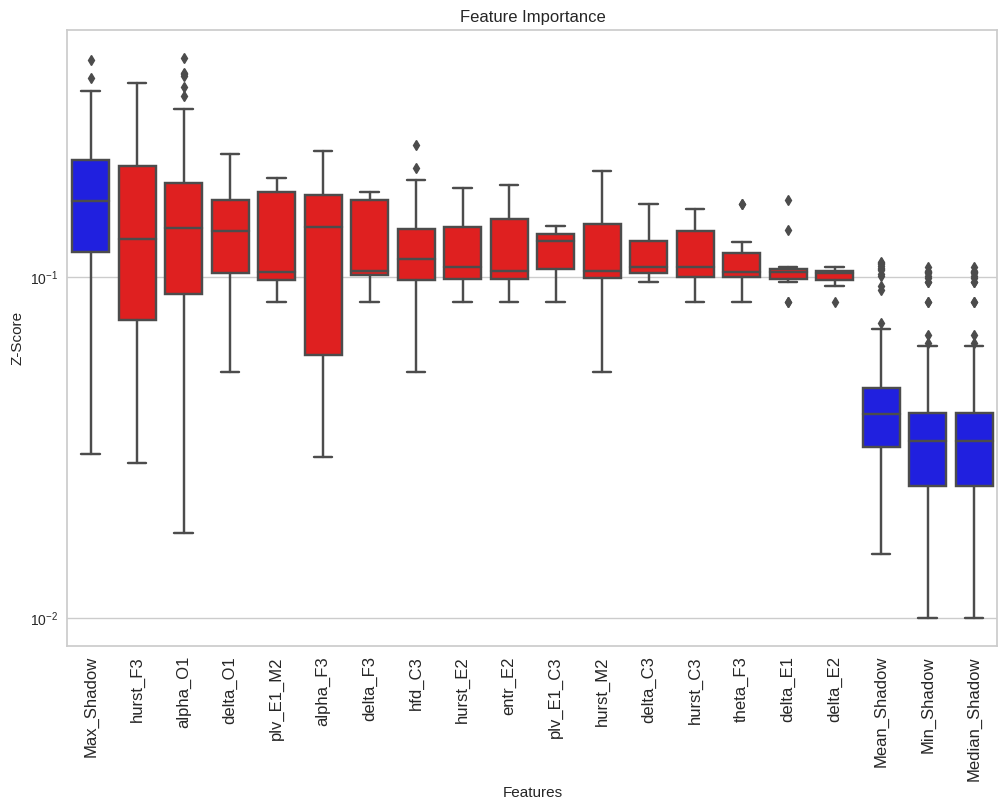

In [153]:
borutashap.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='rejected')